In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.datasets import load_wine

In [28]:
wine = load_wine()
X = wine.data
Y = wine.target

In [29]:
U, s, VT = np.linalg.svd(X)
k = 1

reduced_data = U[:, :k] * s[:k]

while any(f_oneway(X, np.dot(reduced_data, VT[:k])).pvalue < 0.05):
    k += 1
    reduced_data = U[:, :k] * s[:k]

print(f'final k: {k}')

final k: 2


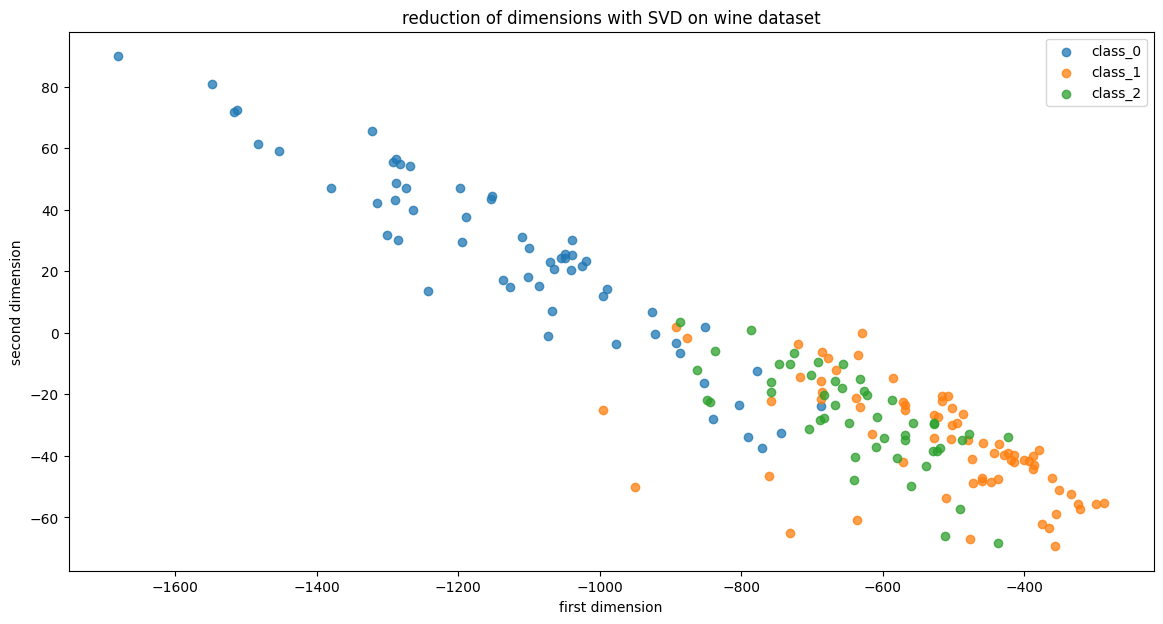

In [30]:
fig, ax = plt.subplots(figsize=(14, 7))

for label in np.unique(Y):
    ax.scatter(reduced_data[Y==label, 0], reduced_data[Y==label, 1], label=wine.target_names[label], alpha=0.75)

ax.set_title('reduction of dimensions with SVD on wine dataset')
ax.set_xlabel('first dimension')
ax.set_ylabel('second dimension')

ax.legend(loc='upper right')

plt.show()